In [1]:
#studying the format of the overall dataset, types of all variables, checking and cleaning the dataset.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import folium
from folium import plugins
from folium.plugins import HeatMap

data = pd.read_csv('../Source/SF_listings_2018.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6506 entries, 0 to 6505
Data columns (total 16 columns):
id                                6506 non-null int64
name                              6505 non-null object
host_id                           6506 non-null int64
host_name                         6491 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     6506 non-null object
latitude                          6506 non-null float64
longitude                         6506 non-null float64
room_type                         6506 non-null object
price                             6506 non-null int64
minimum_nights                    6506 non-null int64
number_of_reviews                 6506 non-null int64
last_review                       5957 non-null object
reviews_per_month                 5945 non-null float64
calculated_host_listings_count    6506 non-null int64
availability_365                  6506 non-null int64
dtypes: float64(4),

In [2]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,21353826,Sprawling Sea Cliff Home with Breathtaking View,3838474,Vassiliki (Celia),NaN,Seacliff,37.788640,-122.486969,Entire home/apt,250,3,3,2017-12-20,1.64,1,0
1,6938818,Best Secret in Town,36381578,Harris,NaN,Seacliff,37.780659,-122.505635,Private room,69,3,71,2017-10-29,2.29,3,169
2,21065885,Best Ever SF Views Looking Glass Penthouse Suite,28223109,Jennifer,NaN,Seacliff,37.787035,-122.493215,Private room,4000,30,0,NaN,NaN,3,365
3,20281663,Lovely SF Bedroom/Bath- Blocks from the Beach.,123931387,Milena,NaN,Seacliff,37.780234,-122.506654,Private room,123,3,1,2017-09-05,0.23,2,69
4,18022892,San Francisco Retreat-2 blocks from the beach!,123931387,Milena,NaN,Seacliff,37.780375,-122.505903,Entire home/apt,169,6,7,2017-11-09,0.86,2,175


In [3]:
# some data having null values that we need to clean up
data.isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                           15
neighbourhood_group               6506
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                        549
reviews_per_month                  561
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [4]:

(data['last_review'].isnull()==data['reviews_per_month'].isnull()).all()

False

In [5]:
#for missing values in reviews_per_month, I will assign them as zero.
data.loc[data['reviews_per_month'].isnull(),'reviews_per_month']=0

In [6]:

len(set(data['id']))

6506

In [7]:

len(set(data['host_id']))

4870

In [8]:

data.drop(['id','name','host_name','last_review'], axis=1, inplace=True)

In [9]:
#checking numeric variables
data.describe()

,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6.506000e+03,0.0,6506.000000,6506.000000,6506.000000,6.506000e+03,6506.000000,6506.000000,6506.000000,6506.00000
mean,3.133173e+07,NaN,37.765236,-122.431915,216.487857,1.537661e+04,39.622041,1.762126,3.268060,134.88257
std,4.085098e+07,NaN,0.022736,0.026503,323.623954,1.239775e+06,60.231809,2.416881,7.938411,135.10414
min,4.600000e+01,NaN,37.704468,-122.511500,0.000000,1.000000e+00,0.000000,0.000000,1.000000,0.00000
25%,3.335893e+06,NaN,37.750439,-122.443886,100.000000,1.000000e+00,4.000000,0.310000,1.000000,3.00000
50%,1.231565e+07,NaN,37.765664,-122.426852,150.000000,2.000000e+00,15.000000,1.000000,1.000000,83.00000
75%,4.292291e+07,NaN,37.783595,-122.412579,250.000000,3.000000e+00,47.000000,2.610000,2.000000,273.00000
max,1.668459e+08,NaN,37.824246,-122.365222,10000.000000,1.000000e+08,561.000000,86.140000,62.000000,365.00000


In [10]:
data=data[data['price']>0]

In [11]:
data=data[data['minimum_nights']<=365]

In [12]:

data.reset_index(drop=True,inplace=True)

In [13]:
#Using describe() can help me understand the range of possible values for each variable

#Analysis:

#in this dataset, there are some abnormalities. The first one is that there are records with “price” = 0 which is 
#unrealistic as this means no need to pay to stay. So these records should be removed.

#Any records with “minimum_nights” larger than 365 will also be removed.

data.info()

#data after cleannig below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6477 entries, 0 to 6476
Data columns (total 12 columns):
host_id                           6477 non-null int64
neighbourhood_group               0 non-null float64
neighbourhood                     6477 non-null object
latitude                          6477 non-null float64
longitude                         6477 non-null float64
room_type                         6477 non-null object
price                             6477 non-null int64
minimum_nights                    6477 non-null int64
number_of_reviews                 6477 non-null int64
reviews_per_month                 6477 non-null float64
calculated_host_listings_count    6477 non-null int64
availability_365                  6477 non-null int64
dtypes: float64(4), int64(6), object(2)
memory usage: 607.3+ KB


In [16]:
data['neighbourhood'].unique()

array(['Seacliff', 'Haight Ashbury', 'Outer Mission',
       'Downtown/Civic Center', 'Diamond Heights', 'Lakeshore',
       'Russian Hill', 'Noe Valley', 'Inner Sunset',
       'Treasure Island/YBI', 'Outer Richmond', 'Crocker Amazon',
       'Excelsior', 'Parkside', 'Financial District', 'Ocean View',
       'Mission', 'West of Twin Peaks', 'Inner Richmond', 'Marina',
       'Bayview', 'Visitacion Valley', 'Pacific Heights',
       'Presidio Heights', 'South of Market', 'Glen Park', 'Potrero Hill',
       'Castro/Upper Market', 'Twin Peaks', 'Bernal Heights', 'Chinatown',
       'North Beach', 'Presidio', 'Nob Hill', 'Outer Sunset',
       'Western Addition', 'Golden Gate Park'], dtype=object)

In [17]:

set(data['neighbourhood'])

{'Bayview',
 'Bernal Heights',
 'Castro/Upper Market',
 'Chinatown',
 'Crocker Amazon',
 'Diamond Heights',
 'Downtown/Civic Center',
 'Excelsior',
 'Financial District',
 'Glen Park',
 'Golden Gate Park',
 'Haight Ashbury',
 'Inner Richmond',
 'Inner Sunset',
 'Lakeshore',
 'Marina',
 'Mission',
 'Nob Hill',
 'Noe Valley',
 'North Beach',
 'Ocean View',
 'Outer Mission',
 'Outer Richmond',
 'Outer Sunset',
 'Pacific Heights',
 'Parkside',
 'Potrero Hill',
 'Presidio',
 'Presidio Heights',
 'Russian Hill',
 'Seacliff',
 'South of Market',
 'Treasure Island/YBI',
 'Twin Peaks',
 'Visitacion Valley',
 'West of Twin Peaks',
 'Western Addition'}

In [19]:
#distribution of price in each neighbourhood_group and across all.
data.groupby('neighbourhood')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Bayview,126.0,127.523810,151.161197,36.0,68.25,95.0,134.75,1500.0
Bernal Heights,370.0,183.281081,132.357412,39.0,100.00,145.0,223.75,1200.0
Castro/Upper Market,355.0,240.549296,184.742651,10.0,125.00,180.0,295.00,1500.0
Chinatown,89.0,220.797753,147.809397,25.0,123.00,225.0,275.00,800.0
Crocker Amazon,27.0,107.629630,68.942087,45.0,70.00,89.0,117.00,325.0
Diamond Heights,18.0,197.055556,105.626129,70.0,111.25,164.5,274.25,390.0
Downtown/Civic Center,355.0,169.935211,112.237308,33.0,99.00,144.0,209.00,700.0
Excelsior,139.0,115.949640,74.140713,36.0,69.00,99.0,137.00,450.0
Financial District,113.0,255.716814,307.281498,38.0,103.00,150.0,298.00,2000.0


In [21]:

len(set(data['neighbourhood']))

37

In [23]:
#The following breakdown show more accurately on the price

data.pivot_table(index='neighbourhood',columns='room_type',values='price',aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Bayview,196.458333,86.052632,49.000000
Bernal Heights,226.811966,108.382353,NaN
Castro/Upper Market,301.040359,139.376923,72.000000
Chinatown,257.693548,209.125000,29.818182
Crocker Amazon,145.000000,81.937500,NaN
Diamond Heights,259.333333,134.777778,NaN
Downtown/Civic Center,212.740196,113.250000,55.666667
Excelsior,168.676923,69.635135,NaN
Financial District,369.107143,139.450000,155.764706


In [51]:
ny_map = folium.Map(location=[37.76, -122.45],zoom_start =40)
data_loc= data[['latitude','longitude']].values
data_loc =data_loc.tolist()
hm = plugins.HeatMap(data_loc)
hm.add_to(ny_map)
ny_map

In [34]:
#Performing small breakdown per each neibourhood

for gp in set(data['neighbourhood']):
    print(data.loc[data['neighbourhood']==gp,].groupby(['neighbourhood']).agg({'price':['count','mean']}).sort_values(by=('price', 'mean'),ascending=False).head())
    print()

              price           
              count       mean
neighbourhood                 
Outer Sunset    243  141.17284

              price            
              count        mean
neighbourhood                  
Russian Hill    153  305.287582

              price            
              count        mean
neighbourhood                  
Noe Valley      300  257.213333

              price           
              count       mean
neighbourhood                 
Marina          203  298.37931

                 price       
                 count   mean
neighbourhood                
Golden Gate Park     5  298.4

                      price            
                      count        mean
neighbourhood                          
Downtown/Civic Center   355  169.935211

                   price            
                   count        mean
neighbourhood                       
Financial District   113  255.716814

              price            
              count        me

In [35]:
#Analysis:
# The above showing the top  most expensive neighborhoods in each group.

In [37]:
#Next variable to be studied is “minimum_nights”
data.groupby('neighbourhood')['minimum_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Bayview,126.0,5.873016,9.782420,1.0,1.00,2.0,3.00,30.0
Bernal Heights,370.0,5.208108,8.907379,1.0,2.00,2.5,3.75,90.0
Castro/Upper Market,355.0,6.042254,9.856365,1.0,2.00,3.0,4.00,90.0
Chinatown,89.0,8.213483,11.546814,1.0,1.00,2.0,5.00,31.0
Crocker Amazon,27.0,2.814815,5.491511,1.0,1.00,2.0,2.50,30.0
Diamond Heights,18.0,2.833333,2.036433,1.0,2.00,2.0,3.00,7.0
Downtown/Civic Center,355.0,5.219718,20.589673,1.0,1.00,2.0,3.00,365.0
Excelsior,139.0,6.093525,9.340493,1.0,2.00,2.0,4.00,30.0
Financial District,113.0,7.424779,19.109088,1.0,1.00,2.0,4.00,180.0


In [38]:
#Analysis:
#As all records with ‘minimum_nights’ larger than 365 were removed already, the max is only 365.
#As shown, over 25% of Airbnb place only require 1 night and over half only 
#require 2 or 3 nights which fits in the original principle of Airbnb service, a short term accommodation.

In [42]:
#Next i will analyse reviews_per_month since this can eliminate the effect of duration listing on Airbnb.
for gp in set(data['neighbourhood']):
    print(gp)
    print(data[data['neighbourhood']==gp][['price','reviews_per_month']].corr())
    print()

Outer Sunset
                      price  reviews_per_month
price              1.000000          -0.240642
reviews_per_month -0.240642           1.000000

Russian Hill
                      price  reviews_per_month
price              1.000000          -0.236391
reviews_per_month -0.236391           1.000000

Noe Valley
                      price  reviews_per_month
price              1.000000          -0.165625
reviews_per_month -0.165625           1.000000

Marina
                      price  reviews_per_month
price              1.000000          -0.188503
reviews_per_month -0.188503           1.000000

Golden Gate Park
                      price  reviews_per_month
price              1.000000          -0.317524
reviews_per_month -0.317524           1.000000

Downtown/Civic Center
                      price  reviews_per_month
price              1.000000          -0.358549
reviews_per_month -0.358549           1.000000

Financial District
                      price  reviews_per_month

ValueError: cannot convert float NaN to integer

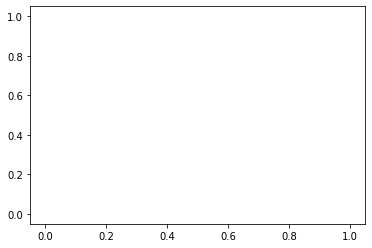

In [54]:
sns.distplot(data['reviews_per_month'],kde=False)
plt.ylabel('Number of records')
plt.xlim(0,100000)
plt.show()